In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Exploring Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.shape

(1338, 7)

# Checking Data Quality

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Visualization

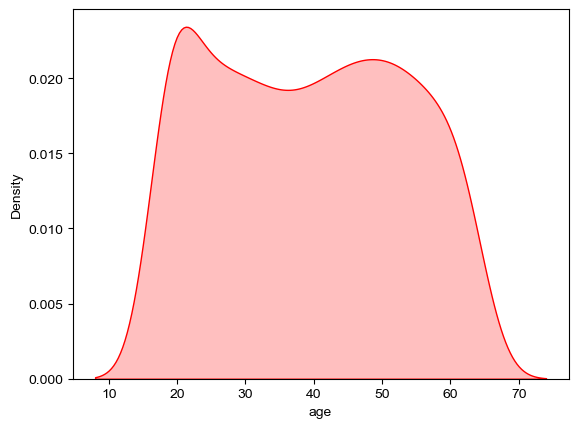

In [11]:
sns.kdeplot(df['age'], shade=True, color="r")
sns.set(rc={'figure.figsize':(4,4)})

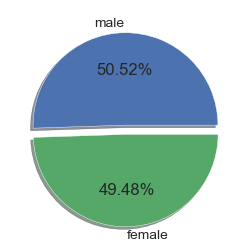

In [12]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(3,3))
plt.pie(x=df["sex"].value_counts(), 
        labels=["male","female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1),
       
        )
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


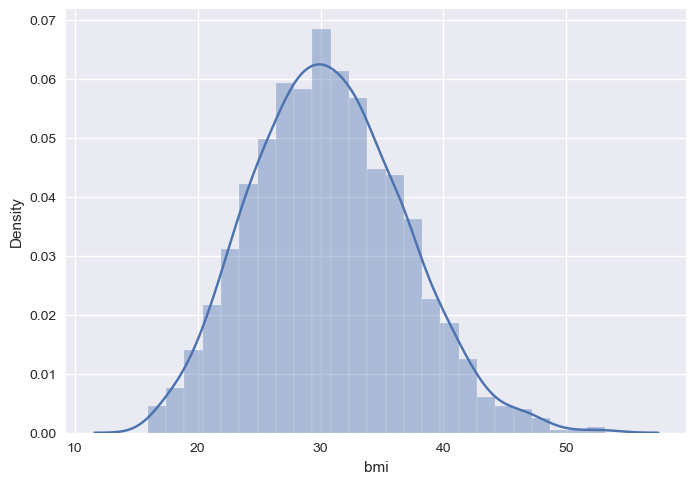

In [13]:
sns.distplot(df['bmi'])
plt.show()

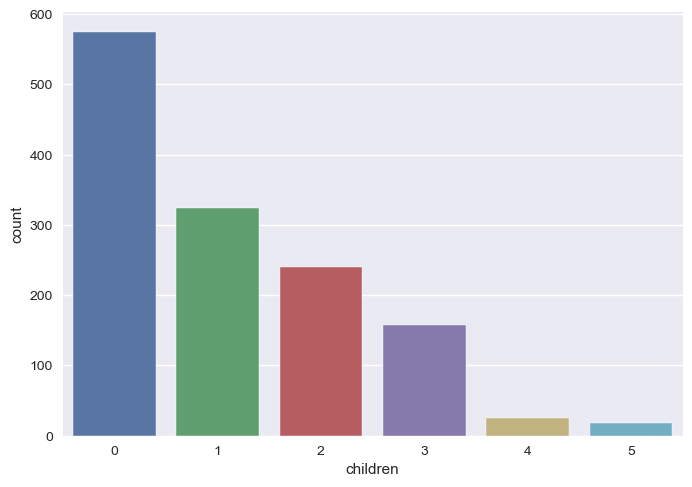

In [14]:
sns.countplot(x=df['children'])
sns.set(rc={'figure.figsize':(3,3)})

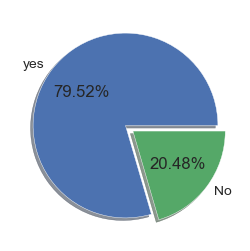

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(3,3))
plt.pie(x=df["smoker"].value_counts(), 
        labels=["yes","No"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1),
       
        )
plt.show()

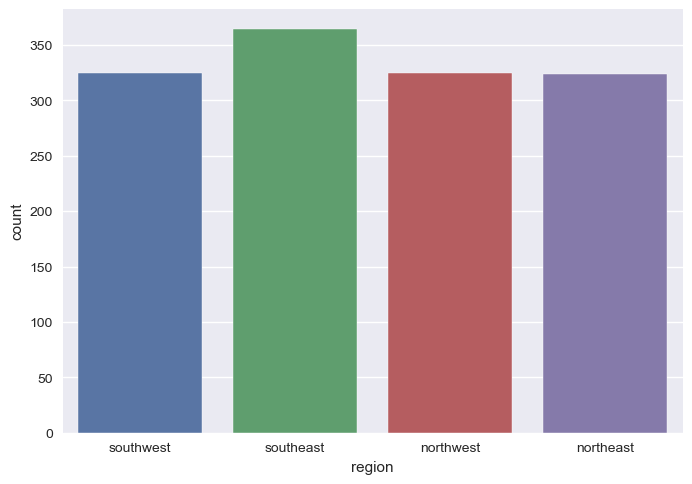

In [16]:
sns.countplot(x=df['region'])
sns.set(rc={'figure.figsize':(4,4)})

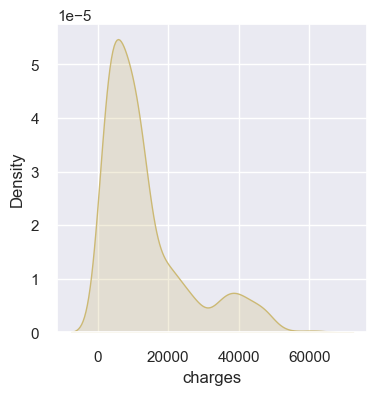

In [17]:
sns.kdeplot(df['charges'], shade=True, color="y")
sns.set(rc={'figure.figsize':(4,4)})

# 

# Correlation

<AxesSubplot:xlabel='age', ylabel='charges'>

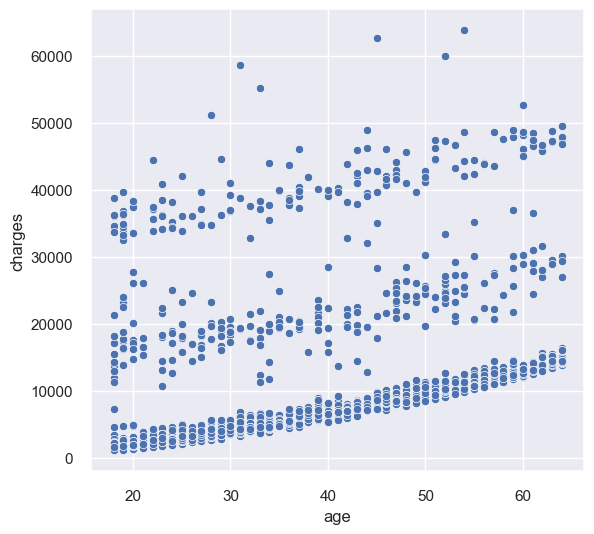

In [40]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='age',y='charges',data=df,)

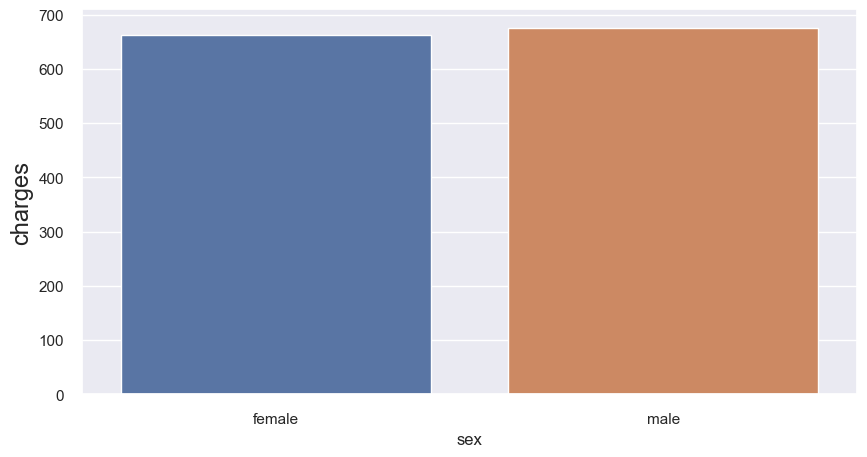

In [36]:
fig1 = sns.kdeplot(df['sqft_living'], shade=True, color="r")
fig2 = sns.kdeplot(df[df['sqft_lot']<20000]['sqft_lot'], shade=True, color="b")

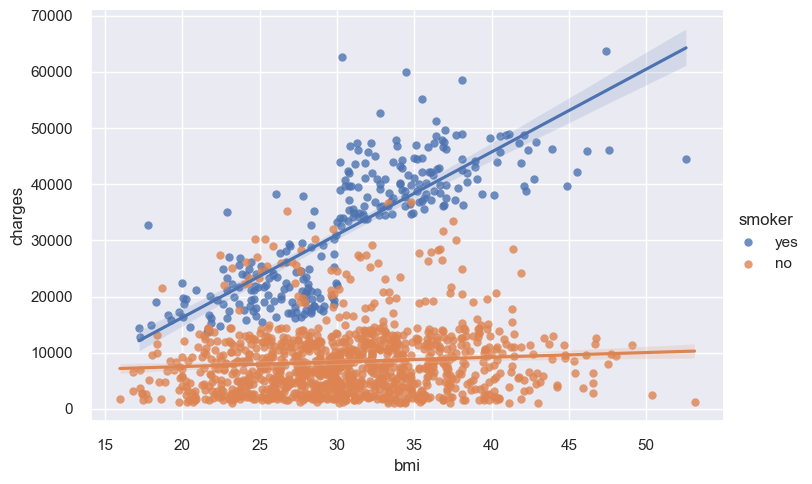

In [28]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df,aspect=1.5,height=5)

<AxesSubplot:xlabel='children', ylabel='charges'>

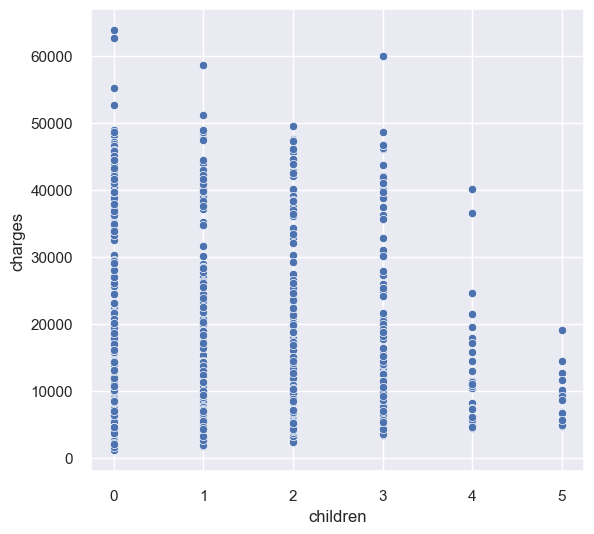

In [44]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='children',y='charges',data=df,)

<AxesSubplot:xlabel='region', ylabel='charges'>

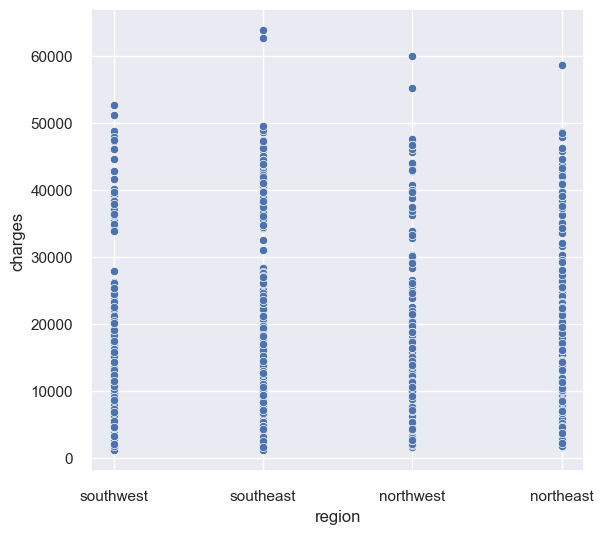

In [45]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='region',y='charges',data=df,)

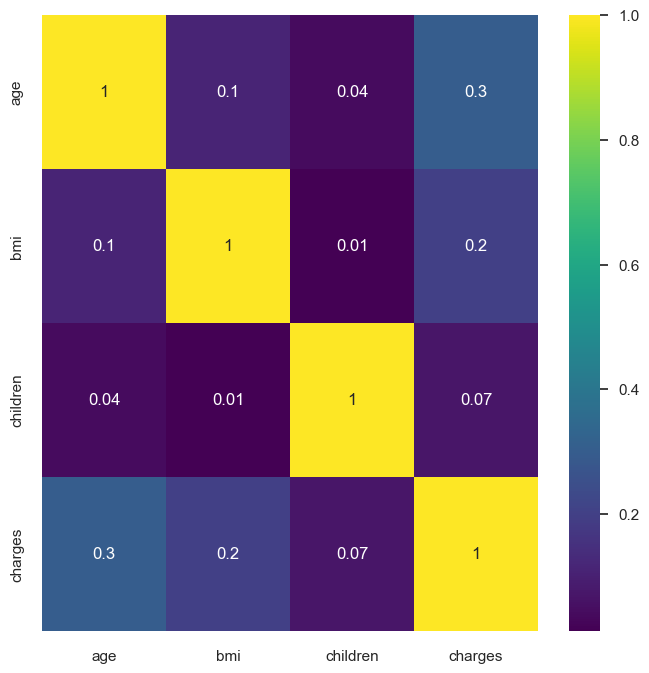

In [46]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True)